<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/Transfer_Learning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Загрузка весов предобученной модели
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

# Заморозка всех слоев InceptionV3
for layer in pre_trained_model.layers:
    layer.trainable = False

# Создание новой "головы" модели
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)

# Компиляция модели
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

# Загрузка и распаковка данных
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Подготовка генераторов данных
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20,
                                                    class_mode='binary', target_size=(150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20,
                                                        class_mode='binary', target_size=(150, 150))

--2024-04-21 16:56:50--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   162MB/s    in 0.5s    

2024-04-21 16:56:50 (162 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

--2024-04-21 16:56:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|

In [8]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import RMSprop

# Скачивание данных
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Распаковка данных
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Определение директорий
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Подготовка генераторов данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224)
)

# Загрузка и настройка модели MobileNetV2
pre_trained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in pre_trained_model.layers:
    layer.trainable = False

# Добавление новых слоев
last_output = pre_trained_model.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

--2024-04-21 16:57:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   222MB/s    in 0.3s    

2024-04-21 16:57:40 (222 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Training InceptionV3


Epoch 1/20
100/100 - 28s - loss: 0.3105 - accuracy: 0.8700 - val_loss: 0.5204 - val_accuracy: 0.8560 - 28s/epoch - 277ms/step
Epoch 2/20
100/100 - 20s - loss: 0.2282 - accuracy: 0.9050 - val_loss: 0.2711 - val_accuracy: 0.9120 - 20s/epoch - 200ms/step
Epoch 3/20
100/100 - 19s - loss: 0.2225 - accuracy: 0.9080 - val_loss: 0.1461 - val_accuracy: 0.9440 - 19s/epoch - 188ms/step
Epoch 4/20
100/100 - 20s - loss: 0.2162 - accuracy: 0.9195 - val_loss: 0.1630 - val_accuracy: 0.9400 - 20s/epoch - 201ms/step
Epoch 5/20
100/100 - 20s - loss: 0.1874 - accuracy: 0.9270 - val_loss: 0.1203 - val_accuracy: 0.9550 - 20s/epoch - 198ms/step
Epoch 6/20
100/100 - 19s - loss: 0.1547 - accuracy: 0.9365 - val_loss: 0.1661 - val_accuracy: 0.9490 - 19s/epoch - 186ms/step
Epoch 7/20
100/100 - 21s - loss: 0.1886 - accuracy: 0.9300 - val_loss: 0.1358 - val_accuracy: 0.9570 - 21s/epoch - 210ms/step
Epoch 8/20
100/100 - 19s - loss: 0.1517 - accuracy: 0.9385 - val_loss: 0.1196 - val_accuracy: 0.9520 - 19s/epoch - 187

Training MobileNetV2


Epoch 1/20
100/100 - 23s - loss: 0.3482 - accuracy: 0.8430 - val_loss: 0.1941 - val_accuracy: 0.9210 - 23s/epoch - 231ms/step
Epoch 2/20
100/100 - 18s - loss: 0.2327 - accuracy: 0.9020 - val_loss: 0.1775 - val_accuracy: 0.9280 - 18s/epoch - 182ms/step
Epoch 3/20
100/100 - 18s - loss: 0.2027 - accuracy: 0.9130 - val_loss: 0.1203 - val_accuracy: 0.9510 - 18s/epoch - 178ms/step
Epoch 4/20
100/100 - 19s - loss: 0.2019 - accuracy: 0.9110 - val_loss: 0.1515 - val_accuracy: 0.9460 - 19s/epoch - 190ms/step
Epoch 5/20
100/100 - 18s - loss: 0.1940 - accuracy: 0.9080 - val_loss: 0.1280 - val_accuracy: 0.9500 - 18s/epoch - 177ms/step
Epoch 6/20
100/100 - 19s - loss: 0.1818 - accuracy: 0.9260 - val_loss: 0.1225 - val_accuracy: 0.9550 - 19s/epoch - 189ms/step
Epoch 7/20
100/100 - 18s - loss: 0.1791 - accuracy: 0.9235 - val_loss: 0.1528 - val_accuracy: 0.9440 - 18s/epoch - 178ms/step
Epoch 8/20
100/100 - 21s - loss: 0.1711 - accuracy: 0.9240 - val_loss: 0.1372 - val_accuracy: 0.9520 - 21s/epoch - 208

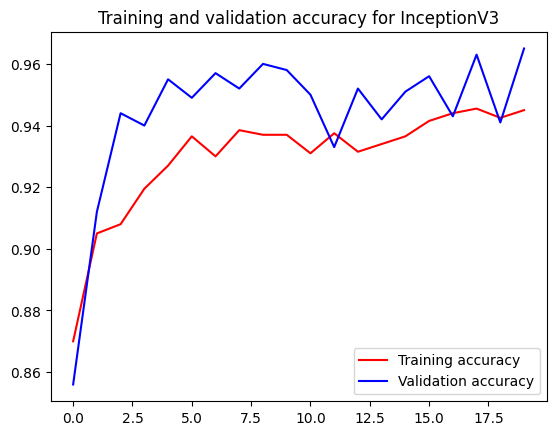

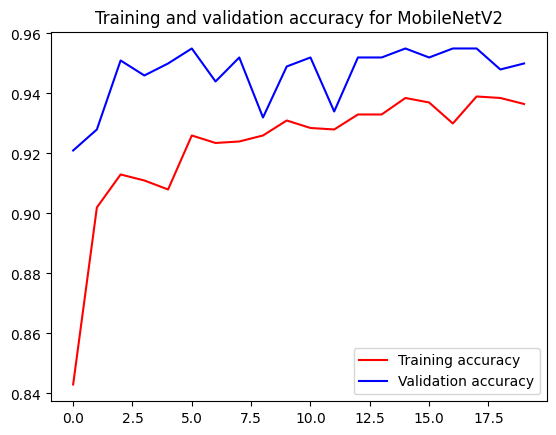

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Установите базовый путь к директории, где хранятся данные
base_dir = '/tmp/cats_and_dogs_filtered'

# Установите пути к директориям обучения и валидации
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Параметры обучения
batch_size = 20
target_size = (150, 150)
epochs = 20

# Создание генераторов данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary')

# Функция для создания и обучения модели
def train_model(base_model):
    # Замораживаем веса предобученной модели
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=RMSprop(lr=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        steps_per_epoch=np.ceil(train_generator.samples / batch_size),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=np.ceil(validation_generator.samples / batch_size),
        verbose=2)

    return history

# Загрузка и обучение InceptionV3
print("Training InceptionV3")
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
inception_history = train_model(inception_base)

# Загрузка и обучение MobileNetV2
print("Training MobileNetV2")
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
mobilenet_history = train_model(mobilenet_base)

# Функция для отображения графиков точности
def plot_accuracy(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.figure()
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(title)
    plt.legend(loc=0)
    plt.show()

plot_accuracy(inception_history, 'Training and validation accuracy for InceptionV3')
plot_accuracy(mobilenet_history, 'Training and validation accuracy for MobileNetV2')